<a href="https://colab.research.google.com/github/mayreeann/Hamoye-Data-Science/blob/main/Time_Series_graded_quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in the dataset

df = pd.read_csv("/content/household_power_consumption.txt", delimiter=';', parse_dates={'Timestamp':['Date','Time']})
df.set_index('Timestamp', inplace = True)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Timestamp,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
# make a copy of the dataframe to work with
df_consumption = df.copy()

In [6]:
# check the shape of the dataset
df_consumption.shape

(750117, 7)

In [5]:
# check for missing values
df_consumption.isnull().sum()

Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            1
Sub_metering_1              1
Sub_metering_2              1
Sub_metering_3           3943
dtype: int64

In [7]:
# check the data types
df_consumption.dtypes

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [8]:
# convert the object types to float
df_consumption = df_consumption.astype('float')

ValueError: ignored

In [10]:
# some columns contain '?' and thus could not be converted to float
# look through the colunms to see where the '?' is

error = df_consumption[df_consumption['Global_active_power'] == '?']
error.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Timestamp,,,,,,,
2006-12-21 11:23:00,?,?,?,?,?,?,NaN
2006-12-21 11:24:00,?,?,?,?,?,?,NaN
2006-12-30 10:08:00,?,?,?,?,?,?,NaN
2006-12-30 10:09:00,?,?,?,?,?,?,NaN
2007-01-14 18:36:00,?,?,?,?,?,?,NaN


In [12]:
# from the dataframe above the '?' values are in the positions where Sub_metering_3 has missing values
# replace the '?' with nan values

df_consumption.replace('?',np.nan, inplace = True)
#check for missing values
df_consumption.isnull().sum()

Global_active_power      3942
Global_reactive_power    3942
Voltage                  3942
Global_intensity         3943
Sub_metering_1           3943
Sub_metering_2           3943
Sub_metering_3           3943
dtype: int64

In [16]:
# convert the datatypes to float
df_consumption = df_consumption.astype(float)

# confirm the datatypes
df_consumption.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [17]:
#Filling missing data by imputation - Forward fill
df_consumption_ffill = df_consumption.fillna(method='ffill')
df_consumption_ffill.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Text(0.5, 1.0, 'Hourly Global Active Power over Time')

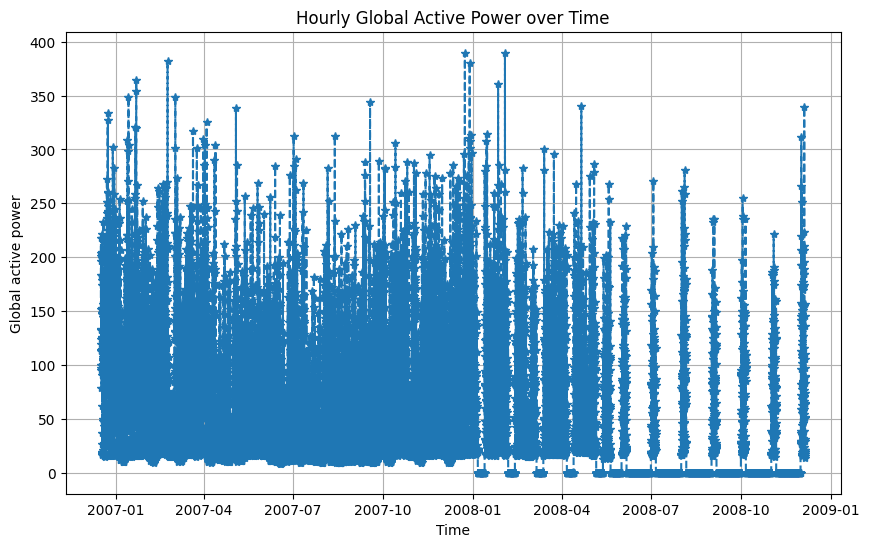

In [22]:
#Upsample to hourly data points
df_hourly = df_consumption_ffill.resample('H').sum()

plt.figure(figsize=(10,6))
plt.plot(df_hourly.index, df_hourly.Global_active_power, '--', marker='*', )
plt.grid()
plt.xlabel('Time')
plt.ylabel('Global active power')
plt.title('Hourly Global Active Power over Time')

In [23]:
df_hourly['Global_active_power'].corr(df_hourly['Voltage'])

0.5129376601188181

In [24]:
df_hourly['Voltage'].corr(df_hourly['Global_intensity'])

0.5166116645071624